In [55]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [56]:
data_path = "./data/lot5.csv"
df = pd.read_csv(data_path)
df.head(5)

,id,url,url_full,name,price,brand,item_condition,shipping,located_in,last_price,...,category,authenticity,money_back,seller_positive_feedback,seller_feedback_comments,seller_item_sold,seller_all_feedback_url,trending,stock,watchers
0,1,https://www.ebay.ca/itm/111184493272,https://www.ebay.ca/itm/111184493272,Mens Jogging Bottoms Elasticated Trouser Jogge...,C $14.48,Crazy Girl Ltd,New with tags,(approx C $10.20),"London, United Kingdom",NaN,...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",NaN,Yes,98.9% positive feedback,"[""5 \u2b50\ufe0f "", ""Great seller! great merch...",203K,NaN,Yes/3,"6 available/3,324 sold",NaN
1,2,https://www.ebay.ca/itm/111206598777,https://www.ebay.ca/itm/111206598777,Men's 100% Cotton Big Polka Dot Design Spread...,C $29.19,George/Fortino Landi,New with tags,(approx C $7.30),"Ridgewood, New York, United States",NaN,...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",NaN,Yes,99.4% positive feedback,"[""the shirt is cut weirdly and very well made,...",49K,NaN,Yes/56,Last One/56 sold,NaN
2,4,https://www.ebay.ca/itm/111064770634,https://www.ebay.ca/itm/111064770634,G-Unit Style heavy weigh Tank Top Square Cut ...,C $15.89,Basix,New with tags,(approx C $25.88),"Desoto, Texas, United States",NaN,...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",NaN,Yes,97.1% positive feedback,"[""Beware bad seller! Reason being, two minutes...",207K,NaN,Yes/5,"More than 10 available/5,632 sold",NaN
3,5,https://www.ebay.ca/itm/111229384406,https://www.ebay.ca/itm/111229384406,Men's Fashion Oxford Faux Leather Dress Shoes...,C $33.23,Milano Moda & Alberto Fellini,New with box,(approx C $56.04),"Ridgewood, New York, United States",NaN,...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",NaN,Yes,99.4% positive feedback,"[""Great interaction with the seller; outstandi...",49K,NaN,Yes/715,Last One/715 sold,NaN
4,6,https://www.ebay.ca/itm/111359507815,https://www.ebay.ca/itm/111359507815,Women's Cute Caged Peep Toe Low High Platform ...,C $15.81,Top Moda,New without box,(approx C $30.72),"South San Francisco, California, United States",US $16.99,...,"Clothing, Shoes & Accessories/Women/Women's Sh...",NaN,Yes,98.7% positive feedback,"[""GREAT SELLER, FAST SHIPPING, SMOOTH TRANSACT...",326K,NaN,No,"Last One/1,516 sold",NaN


In [57]:
df.shape[0]

35272

In [58]:
irrelevant_cols = ["id", "url", "url_full", "us_price", "seller_all_feedback_url", "description_url", "seller_positive_feedback", "seller_feedback_comments"]
df.drop(irrelevant_cols, axis=1, inplace=True)

In [59]:
null_vals = df.isna().sum()
null_vals

name                   16
price                  56
brand                 128
item_condition         18
shipping                0
located_in            487
last_price          28638
return_policy          18
category               55
authenticity        35141
money_back              0
seller_item_sold     1025
trending                0
stock               18029
watchers            33005
dtype: int64

name                   16
price                  56
brand                 128
item_condition         18
shipping                0
located_in            487
last_price          28638
return_policy          18
category               55
authenticity        35141
money_back              0
seller_item_sold     1025
trending                0
stock               18029
watchers            33005
dtype: int64


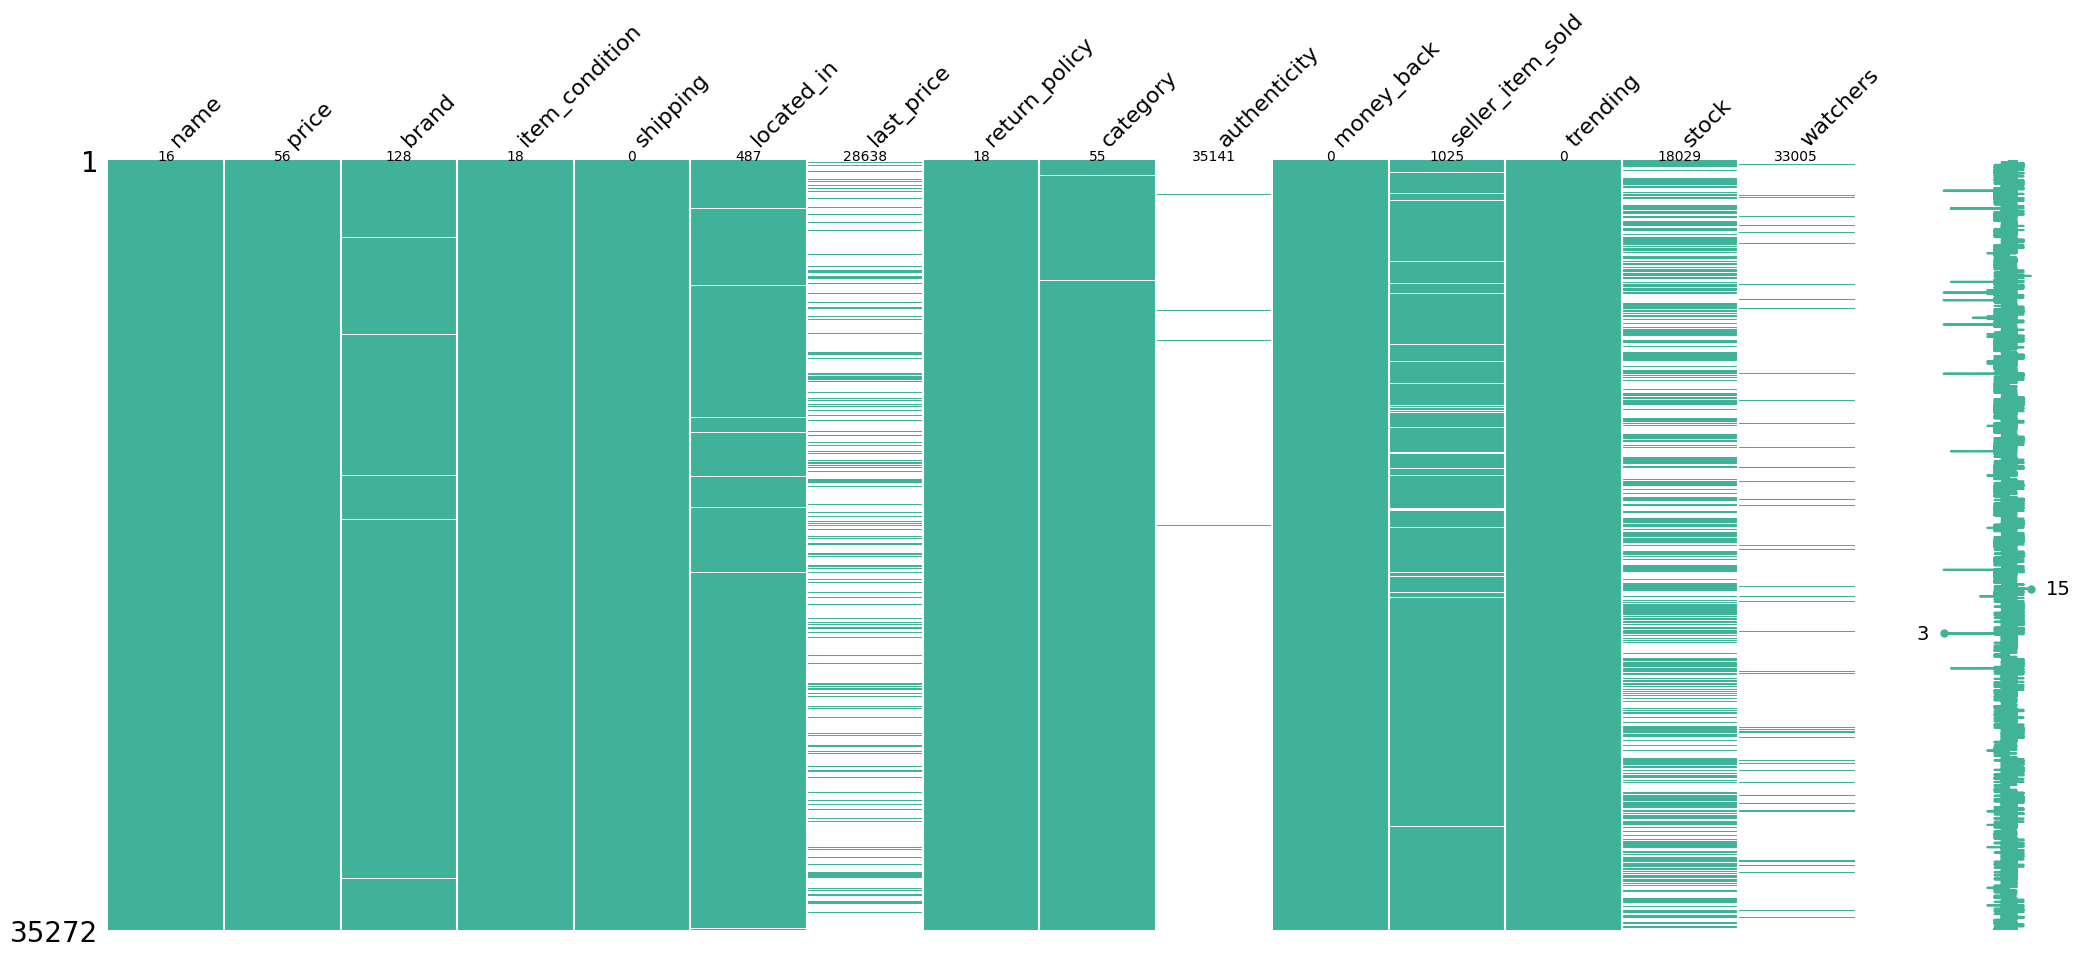

In [60]:
msno.matrix(df, color=(0.25, 0.70, 0.6))

for i, cnt in enumerate(null_vals):
    plt.text(i, -0.5, cnt, ha='center', va='baseline', rotation=0)
print(null_vals)
plt.show()

In [61]:
drop_cols = ["last_price", "authenticity", "stock", "watchers"]
df.drop(drop_cols, axis=1, inplace=True)

In [62]:
df.head()

,name,price,brand,item_condition,shipping,located_in,return_policy,category,money_back,seller_item_sold,trending
0,Mens Jogging Bottoms Elasticated Trouser Jogge...,C $14.48,Crazy Girl Ltd,New with tags,(approx C $10.20),"London, United Kingdom",14 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,203K,Yes/3
1,Men's 100% Cotton Big Polka Dot Design Spread...,C $29.19,George/Fortino Landi,New with tags,(approx C $7.30),"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,49K,Yes/56
2,G-Unit Style heavy weigh Tank Top Square Cut ...,C $15.89,Basix,New with tags,(approx C $25.88),"Desoto, Texas, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,207K,Yes/5
3,Men's Fashion Oxford Faux Leather Dress Shoes...,C $33.23,Milano Moda & Alberto Fellini,New with box,(approx C $56.04),"Ridgewood, New York, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,49K,Yes/715
4,Women's Cute Caged Peep Toe Low High Platform ...,C $15.81,Top Moda,New without box,(approx C $30.72),"South San Francisco, California, United States",30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,326K,No


In [63]:
df.isna().sum()

name                  16
price                 56
brand                128
item_condition        18
shipping               0
located_in           487
return_policy         18
category              55
money_back             0
seller_item_sold    1025
trending               0
dtype: int64

### Removing nulls
> name is very specific to the item being sold, can;t fill up with other values (drop)

> price is the target variable drop it

> item_condition, return_policy, located_in and category  can be imputed with most frequently occurring values but here we can introduce a new category unknown as they are categorical

> We can fill seller_item_sold with median but imputing such a large number of values can introduce bias.
> We can try some advanced methods like KNN and MICE but these are computationally expensive and do not guarantee better results.
> We will simply drop these rows to be on the safe side.


In [64]:
df.dropna(subset=["name", "price", "seller_item_sold"], inplace=True)
for col in ['item_condition', 'return_policy', 'located_in', 'category', 'brand']:
    df[col].fillna('Unknown', inplace=True)

In [65]:
df.isna().sum()

name                0
price               0
brand               0
item_condition      0
shipping            0
located_in          0
return_policy       0
category            0
money_back          0
seller_item_sold    0
trending            0
dtype: int64

## Target Variable

In [66]:
df["price"] = df["price"].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
df["price"] = pd.to_numeric(df["price"])
df.shape

(34208, 11)

In [67]:
# https://en.wikipedia.org/wiki/List_of_sovereign_states
countries = [
    "Afghanistan",
    "Albania",
    "Algeria",
    "Andorra",
    "Angola",
    "Antigua and Barbuda",
    "Argentina",
    "Armenia",
    "Australia",
    "Austria",
    "Azerbaijan",
    "Bahamas",
    "Bahrain",
    "Bangladesh",
    "Barbados",
    "Belarus",
    "Belgium",
    "Belize",
    "Benin",
    "Bhutan",
    "Bolivia",
    "Bosnia and Herzegovina",
    "Botswana",
    "Brazil",
    "Brunei",
    "Bulgaria",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cambodia",
    "Cameroon",
    "Canada",
    "Central African Republic",
    "Chad",
    "Chile",
    "China",
    "Colombia",
    "Comoros",
    "Congo (Congo-Brazzaville)",
    "Costa Rica",
    "Croatia",
    "Cuba",
    "Cyprus",
    "Czechia (Czech Republic)",
    "Democratic Republic of the Congo",
    "Denmark",
    "Djibouti",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "Egypt",
    "El Salvador",
    "Equatorial Guinea",
    "Eritrea",
    "Estonia",
    "Eswatini (fmr. 'Swaziland')",
    "Ethiopia",
    "Fiji",
    "Finland",
    "France",
    "Gabon",
    "Gambia",
    "Georgia",
    "Germany",
    "Ghana",
    "Greece",
    "Grenada",
    "Guatemala",
    "Guinea",
    "Guinea-Bissau",
    "Guyana",
    "Haiti",
    "Holy See",
    "Honduras",
    "Hungary",
    "Iceland",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Ireland",
    "Israel",
    "Italy",
    "Jamaica",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kenya",
    "Kiribati",
    "Kuwait",
    "Kyrgyzstan",
    "Laos",
    "Latvia",
    "Lebanon",
    "Lesotho",
    "Liberia",
    "Libya",
    "Liechtenstein",
    "Lithuania",
    "Luxembourg",
    "Madagascar",
    "Malawi",
    "Malaysia",
    "Maldives",
    "Mali",
    "Malta",
    "Marshall Islands",
    "Mauritania",
    "Mauritius",
    "Mexico",
    "Micronesia",
    "Moldova",
    "Monaco",
    "Mongolia",
    "Montenegro",
    "Morocco",
    "Mozambique",
    "Myanmar (formerly Burma)",
    "Namibia",
    "Nauru",
    "Nepal",
    "Netherlands",
    "New Zealand",
    "Nicaragua",
    "Niger",
    "Nigeria",
    "North Korea",
    "North Macedonia (formerly Macedonia)",
    "Norway",
    "Oman",
    "Pakistan",
    "Palau",
    "Palestine State",
    "Panama",
    "Papua New Guinea",
    "Paraguay",
    "Peru",
    "Philippines",
    "Poland",
    "Portugal",
    "Qatar",
    "Romania",
    "Russia",
    "Rwanda",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Saint Vincent and the Grenadines",
    "Samoa",
    "San Marino",
    "Sao Tome and Principe",
    "Saudi Arabia",
    "Senegal",
    "Serbia",
    "Seychelles",
    "Sierra Leone",
    "Singapore",
    "Slovakia",
    "Slovenia",
    "Solomon Islands",
    "Somalia",
    "South Africa",
    "South Korea",
    "South Sudan",
    "Spain",
    "Sri Lanka",
    "Sudan",
    "Suriname",
    "Sweden",
    "Switzerland",
    "Syria",
    "Tajikistan",
    "Tanzania",
    "Thailand",
    "Timor-Leste",
    "Togo",
    "Tonga",
    "Trinidad and Tobago",
    "Tunisia",
    "Turkey",
    "Turkmenistan",
    "Tuvalu",
    "Uganda",
    "Ukraine",
    "United Arab Emirates",
    "United Kingdom",
    "United States",
    "Uruguay",
    "Uzbekistan",
    "Vanuatu",
    "Venezuela",
    "Vietnam",
    "Yemen",
    "Zambia",
    "Zimbabwe"
]

In [68]:
def get_country(location):
    for country in countries:
        if country in location:
            return country
    return "Other"

df['located_in'] = df['located_in'].apply(get_country)

### Outliers


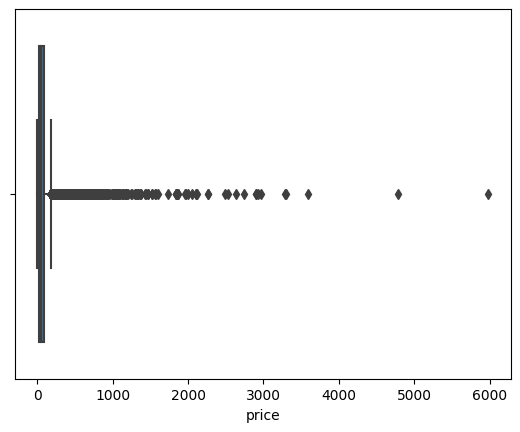

In [69]:
sns.boxplot(x=df['price'])
plt.show()

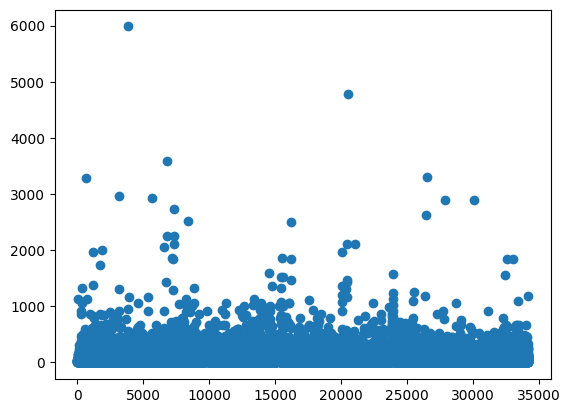

In [70]:
plt.scatter(range(df.shape[0]), df['price'].values)
plt.show()

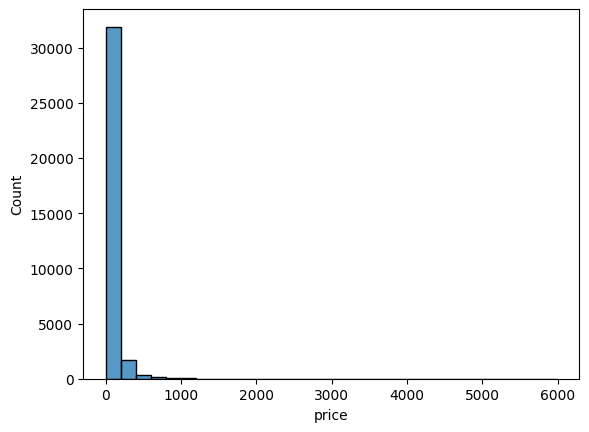

In [71]:
sns.histplot(df['price'], bins=30)
plt.show()

In [72]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
inter_q_range = Q3 - Q1

threshold= 1.5
upper_bound = Q1 - threshold * inter_q_range
lower_bound = Q3 + threshold * inter_q_range
outliers = df[(df["price"] < upper_bound) | (df["price"] > lower_bound)]

df = df[(df["price"] >= upper_bound) & (df["price"] <= lower_bound)]
df.head()

,name,price,brand,item_condition,shipping,located_in,return_policy,category,money_back,seller_item_sold,trending
0,Mens Jogging Bottoms Elasticated Trouser Jogge...,14.48,Crazy Girl Ltd,New with tags,(approx C $10.20),United Kingdom,14 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,203K,Yes/3
1,Men's 100% Cotton Big Polka Dot Design Spread...,29.19,George/Fortino Landi,New with tags,(approx C $7.30),United States,30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,49K,Yes/56
2,G-Unit Style heavy weigh Tank Top Square Cut ...,15.89,Basix,New with tags,(approx C $25.88),United States,30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Clothi...",Yes,207K,Yes/5
3,Men's Fashion Oxford Faux Leather Dress Shoes...,33.23,Milano Moda & Alberto Fellini,New with box,(approx C $56.04),United States,30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Men/Men's Shoes/...",Yes,49K,Yes/715
4,Women's Cute Caged Peep Toe Low High Platform ...,15.81,Top Moda,New without box,(approx C $30.72),United States,30 days return . Buyer pays for return shippi...,"Clothing, Shoes & Accessories/Women/Women's Sh...",Yes,326K,No


In [73]:
df.to_csv("./data/lot3_cleaned_outliers_removed.csv", index=False)

### Distribution of target variable and Statistical Test

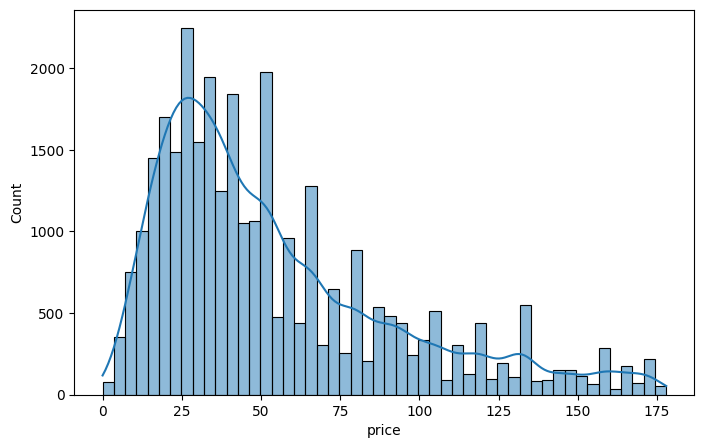

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.show()

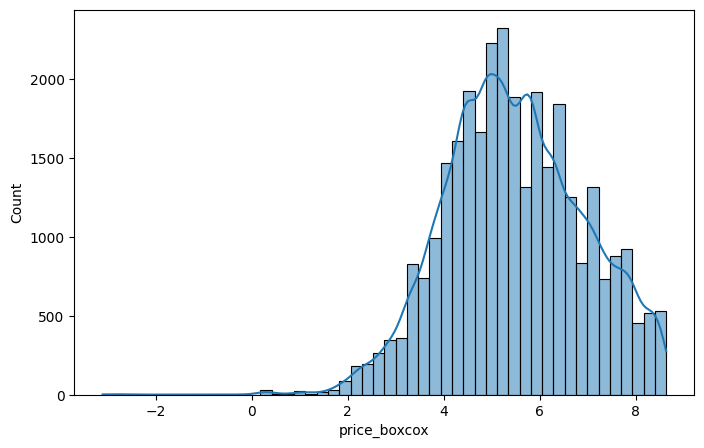

0.18301396146066823

In [75]:
from scipy.stats import boxcox

df['price_boxcox'], lambda_opt = boxcox(df['price'])
plt.figure(figsize=(8,5))
sns.histplot(df['price_boxcox'], bins=50, kde=True)
plt.show()

lambda_opt

> The distribution of price is heavily skewed towards right and the frequency of <br/>
low priced items is high. Now, this skewness can result in difficulties for model <br/>
to predict the higher priced items. It also affects other prices but the higher <br/>
priced items will be affected most.

> We want a bell shape normal distribution for our model to train effectively and <br/>
less skewed data. 

> We can apply a logarithmic transformation for the price column to get more <br/>
bell-shaped distribution

> Once we apply the log transformation, we need to apply inverse of this log <br/>
transformation to the output of the model that is trained on this data because <br/>
the model will give transformed result being trained on transformed data.

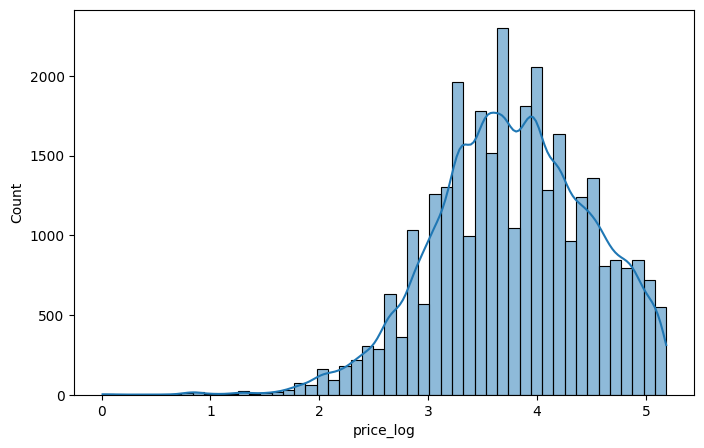

In [76]:
plt.figure(figsize=(8,5))
df['price_log'] = np.log1p(df['price'])
sns.histplot(df['price_log'], bins=50, kde=True)

plt.show()

> We do not use normal np.log here but use np.log1p to prevent the values from being undefined when the input values are 0.

> By doing 1p the value of 0 stays 0 because log(1) = 0

> To inverse this np.log1p we will use np.expm1

### Skewness & Kurtosis

In [77]:
from scipy.stats import skew, kurtosis

price_skewness = skew(df['price'])
price_kurtosis = kurtosis(df['price'])
log_price_skewness = skew(df['price_log'])
log_price_kurtosis = kurtosis(df['price_log'])
box_price_skewness = skew(df['price_boxcox'])
box_price_kurtosis = kurtosis(df['price_boxcox'])

print(f"Skewness & Kurtosis of price: {price_skewness}, {price_kurtosis}")
print(f"Skewness & Kurtosis of log price: {log_price_skewness}, {log_price_kurtosis}")
print(f"Skewness & Kurtosis of boxcox price: {box_price_skewness}, {box_price_kurtosis}")

Skewness & Kurtosis of price: 1.1982446041061177, 0.8503409504122943
Skewness & Kurtosis of log price: -0.2795724385579119, 0.03825134049840351
Skewness & Kurtosis of boxcox price: -0.0026370468255255057, -0.20314149169650264


In [78]:
df.shape

(31170, 13)

### Additional Cleaning


In [79]:
df['return_policy'] = df['return_policy'].apply(lambda x: 0 if 'no' in x.lower() else 1)
df['money_back'] = df['money_back'].apply(lambda x: 1 if 'yes' in x.lower() else 0)
df['trending'] = df['trending'].apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [80]:
df.loc[~df['shipping'].astype(str).str.contains('\$'), 'shipping'] = 0
df.loc[df['shipping'].astype(str).str.contains('\$'), 'shipping'] = 1
df['shipping'] = df['shipping'].astype(float)

In [81]:
# For "seller_positive_feedback"
def to_numbers(short):
    if 'K' in short:
        return float(short.replace('K', '')) * 1000
    elif 'M' in short:
        return float(short.replace('M', '')) * 1000000
    else:
        return float(short)

df["seller_item_sold"] = df["seller_item_sold"].apply(to_numbers)

In [82]:
df.to_csv("./data/lot51_cleaned.csv", index=False)